<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/%08Classify_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 코랩에서 케글 데이터셋 다운로드 받기
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /content/cats_and_dogs_filtered.zip

--2022-05-26 06:46:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 74.125.134.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   176MB/s    in 0.4s    

2022-05-26 06:46:31 (176 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# 다운로드 파일 압축 해제
import os
import zipfile

zip_ref=zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r')  # 압축 해제 대상 설정
zip_ref.extractall('/content')   # content 폴더에 압축 풀기
zip_ref.close()

In [3]:
# 학습/테스트 데이터 기본 경로 설정
base_dir='/content/cats_and_dogs_filtered'
train_dir= os.path.join(base_dir, 'train')
test_dir=os.path.join(base_dir, 'test')

# 훈련 데이터 경로(개/고양이 이미지 경로)
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 테스트 데이터 경로(개/고양이 이미지 경로)
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

test_cats_dir

'/content/cats_and_dogs_filtered/test/cats'

In [4]:
## 파일이름 및 개수 확인
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)
test_cat_fnames=os.listdir(test_cats_dir)
test_dog_fnames=os.listdir(test_dogs_dir)

print('train_cat_img:', len(train_cat_fnames))
print('train_dog_img:', len(train_dog_fnames))
print('test_cat_img:', len(test_cat_fnames))
print('test_dog_img:', len(test_dog_fnames))

train_cat_img: 1000
train_dog_img: 1000
test_cat_img: 500
test_dog_img: 500


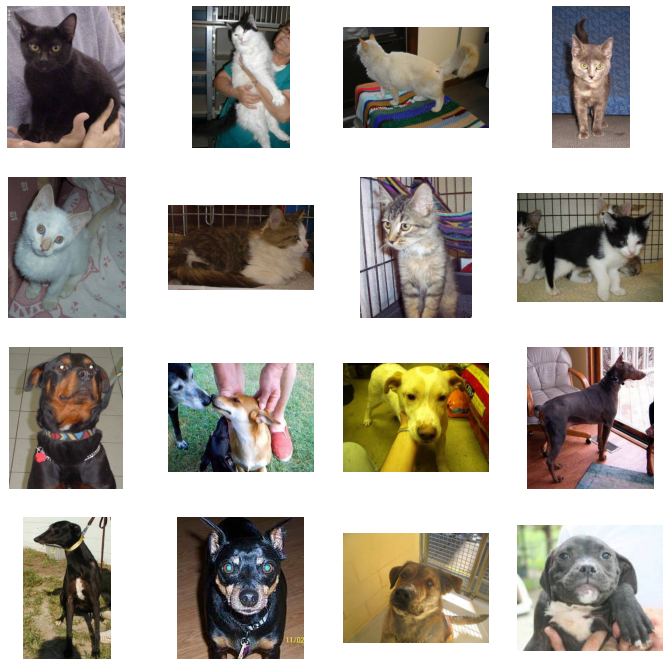

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지 데이터를 255로 나누기
train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                 batch_size=20,
                                                 class_mode='binary',
                                                 target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# 모델 구성
from matplotlib.cbook import flatten
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPool2D(pool_size = (2, 2)),   # strides = 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [9]:
hist=model.fit(train_generator,
               validation_data=test_generator,
               steps_per_epoch=100,    # 에포크에서 훈련에 사용한 배치(batch) 갯수 지정
               epochs=30,
               validation_steps=50,    # 에포크가 끝날때 테스트에 사용되는 배치 개수
               verbose=2)

Epoch 1/30
100/100 - 57s - loss: 0.6899 - acc: 0.5545 - val_loss: 0.6320 - val_acc: 0.6660 - 57s/epoch - 572ms/step
Epoch 2/30
100/100 - 55s - loss: 0.6126 - acc: 0.6690 - val_loss: 0.6061 - val_acc: 0.6810 - 55s/epoch - 548ms/step
Epoch 3/30
100/100 - 55s - loss: 0.5611 - acc: 0.7195 - val_loss: 0.6662 - val_acc: 0.6100 - 55s/epoch - 553ms/step
Epoch 4/30
100/100 - 55s - loss: 0.4987 - acc: 0.7495 - val_loss: 0.6170 - val_acc: 0.6850 - 55s/epoch - 552ms/step
Epoch 5/30
100/100 - 55s - loss: 0.3905 - acc: 0.8145 - val_loss: 0.5882 - val_acc: 0.7170 - 55s/epoch - 551ms/step
Epoch 6/30
100/100 - 55s - loss: 0.3167 - acc: 0.8625 - val_loss: 0.6453 - val_acc: 0.7180 - 55s/epoch - 550ms/step
Epoch 7/30
100/100 - 55s - loss: 0.2164 - acc: 0.9140 - val_loss: 0.7663 - val_acc: 0.7030 - 55s/epoch - 552ms/step
Epoch 8/30
100/100 - 55s - loss: 0.1441 - acc: 0.9430 - val_loss: 0.8353 - val_acc: 0.7010 - 55s/epoch - 552ms/step
Epoch 9/30
100/100 - 55s - loss: 0.0756 - acc: 0.9735 - val_loss: 1.1895

In [11]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

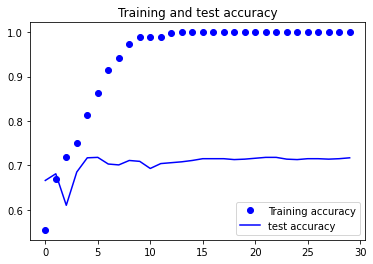

In [13]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='test accuracy')
plt.title('Training and test accuracy')
plt.legend()

plt.show()

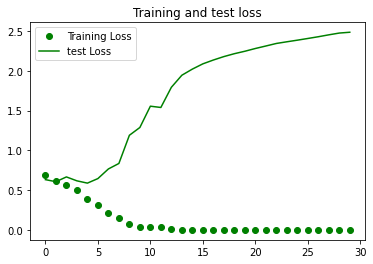

In [14]:
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='test Loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [30]:
uploaded=files.upload()

Saving cati.jpg to cati.jpg
Saving test_dog.jpg to test_dog (1).jpg


In [32]:
uploaded.keys()

dict_keys(['cati.jpg', 'test_dog.jpg'])

In [34]:
for fn in uploaded.keys():
    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))   # keras의 image 객체를 이용해 이미지 읽어오기

    x=image.img_to_array(img)   # 이미지를 배열구조로 변경
    # x=np.expand_dims(x, axis=0) # 차원 추가: https://webnautes.tistory.com/1529
    x=np.reshape(x, (-1, 150, 150, 3))
    images=np.vstack([x])       # 배열 위에서 아래로 붙이기(아래에 추가)
    pred = model.predict(images, batch_size=10)
    print(pred[0])

    if pred[0] > 0:
        print(fn, ': Dog!')
    else:
        print(fn, ': Cat!')


[0.]
cati.jpg : Cat!
[1.]
test_dog.jpg : Dog!
